# First look at ProRail data

In [1]:
# imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
import warnings
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
storing_csv = pd.read_csv("data/sap_storing_data_hu_project.csv", index_col=0)
df = pd.DataFrame(storing_csv)
df.head()

/tmp/ipykernel_91903/674769874.py:1: DtypeWarning: Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types. Specify dtype option on import or set low_memory=False.
  storing_csv = pd.read_csv("data/sap_storing_data_hu_project.csv", index_col=0)


,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_mon_begin_ddt,stm_sap_meldtekst,stm_mon_toelichting_trdl,stm_oh_pg_mld,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2014,07/05/2014 05:30:12,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,34415,3617016,07/05/2014 05:44:24,0
1,50053211,0.0,NaN,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,NaN,Logboeknr Geeltje : 49 Tijd: 0900,NaN,NaN,...,1,2006,02/01/2006 09:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704590,13/06/2013 13:37:52,0
2,50053213,48.0,GN,02/01/2006 12:35:00,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-P,NaN,NaN,...,1,2006,02/01/2006 12:35:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704591,13/06/2013 13:37:52,0
3,50053214,72.0,ZL,02/01/2006 16:40:00,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-P,NaN,NaN,...,1,2006,02/01/2006 16:40:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704592,13/06/2013 13:37:52,0
4,50053215,96.0,ZL,02/01/2006 22:30:00,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-P,NaN,NaN,...,1,2006,02/01/2006 22:30:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704593,13/06/2013 13:37:52,0


In [3]:
df = df[[
 '#stm_sap_meldnr',
 'stm_mon_nr',
 'stm_vl_post',
 'stm_sap_meld_ddt',
 'stm_sap_meldtekst_lang',
 'stm_sap_meldtekst',
 'stm_geo_mld',
 'stm_geo_mld_uit_functiepl',
 'stm_equipm_nr_mld',
 'stm_equipm_soort_mld',
 'stm_equipm_omschr_mld',
 'stm_km_van_mld',
 'stm_km_tot_mld',
 'stm_prioriteit',
 'stm_status_melding_sap',
 'stm_aanngeb_ddt',
 'stm_oh_pg_gst',
 'stm_geo_gst',
 'stm_geo_gst_uit_functiepl',
 'stm_equipm_nr_gst',
 'stm_equipm_soort_gst',
 'stm_equipm_omschr_gst',
 'stm_km_van_gst',
 'stm_km_tot_gst',
 'stm_oorz_groep',
 'stm_oorz_code',
 'stm_oorz_tkst',
 'stm_fh_ddt',
 'stm_fh_status',
 'stm_sap_storeind_ddt',
 'stm_tao_indicator',
 'stm_tao_indicator_vorige',
 'stm_tao_soort_mutatie',
 'stm_tao_telling_mutatie',
 'stm_tao_beinvloedbaar_indicator',
 'stm_evb',
 'stm_sap_melddatum',
 'stm_sap_meldtijd',
 'stm_contractgeb_mld',
 'stm_functiepl_mld',
 'stm_techn_mld',
 'stm_contractgeb_gst',
 'stm_functiepl_gst',
 'stm_techn_gst',
 'stm_aanngeb_dd',
 'stm_aanngeb_tijd',
 'stm_aanntpl_dd',
 'stm_aanntpl_tijd',
 'stm_arbeid',
 'stm_progfh_in_datum',
 'stm_progfh_in_tijd',
 'stm_progfh_in_invoer_dat',
 'stm_progfh_in_invoer_tijd',
 'stm_progfh_in_duur',
 'stm_progfh_gw_tijd',
 'stm_progfh_gw_lwd_datum',
 'stm_progfh_gw_lwd_tijd',
 'stm_progfh_gw_duur',
 'stm_progfh_gw_teller',
 'stm_afspr_aanvangdd',
 'stm_afspr_aanvangtijd',
 'stm_fh_dd',
 'stm_fh_tijd',
 'stm_fh_duur',
 'stm_reactie_duur',
 'stm_sap_storeinddatum',
 'stm_sap_storeindtijd',
 'stm_oorz_tekst_kort',
 'stm_pplg_van',
 'stm_pplg_naar',
 'stm_dstrglp_van',
 'stm_dstrglp_naar']]

In [4]:
df.sample(20)

,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,...,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
265236,80397800,0.0,NaN,01/03/2007 07:47:00,"MvtW: melding van Politie, overweg,Europaweg,...","MvtW: melding van Politie, overweg,Europ",950.0,950.0,10657958.0,OVERWEG,...,10:07:00,140.0,114.0,01/03/2007,10:07:00,NaN,NaN,NaN,NaN,NaN
869123,80905090,0.0,NaN,19/01/2018 08:43:16,Ah-Zp : Ovw 10.4 PAG defect (noordzijde).,Ah-Zp : Ovw 10.4 PAG defect (noordzijde),34,34.0,10211542.0,OVERWEG,...,09:45:00,62.0,47.0,19/01/2018,11:58:01,NaN,NaN,NaN,NaN,NaN
502458,80694853,0.0,NaN,03/12/2012 17:14:00,Hlm-Ld : viad 18.0 hoogtebord ontbreekt.,Hlm-Ld : viad 18.0 hoogtebord ontbreekt.,527,527.0,10333018.0,SPOORBRUG,...,13:09:00,1194.0,1185.0,04/12/2012,13:11:00,NaN,NaN,NaN,NaN,NaN
139403,50168071,5485648.0,ASD,31/01/2019 18:36:00,AFGEWEZEN: In toon te zien dat trein 47750 voo...,AFGEWEZEN: In toon te zien dat trein 477,NaN,NaN,NaN,NaN,...,00:00:00,0.0,0.0,NaN,00:00:00,NaN,BKLA,NaN,MAS,BKLA
188997,70360357,0.0,NaN,09/04/2018 09:59:31,Wspl : Sp-ZC2 km 52.5 Hek wil niet op slot.,Wspl : Sp-ZC2 km 52.5 Hek wil niet op sl,538,538.0,11572899.0,PLAATSBEP,...,10:36:17,32.0,30.0,09/04/2018,10:42:00,Hekwerk,NaN,NaN,NaN,NaN
301433,80442609,258257.0,ASD,02/02/2008 18:13:00,Ac knik(ken)in sp 647 van km11.0-11.8 Rijden ...,Ac knik(ken)in sp 647 van km11.0-11.8,80,80.0,10771850.0,SPOORSPS,...,20:52:00,157.0,34.0,04/02/2008,03:52:00,NaN,AC,NaN,AC,NaN
699237,80802368,0.0,NaN,10/04/2015 13:21:00,Rm : Omroep gestoord. Marvalnr 30971,Rm : Omroep gestoord.,519,519.0,11344487.0,OMROEPOP,...,15:45:00,144.0,69.0,15/04/2015,15:42:00,NaN,NaN,NaN,NaN,NaN
205214,70415355,5273619.0,EHV,14/10/2018 20:21:26,"Vl : S-46 niet uit de stand Stop , na ROZ rij...","Vl : S-46 niet uit de stand Stop , na R",517,517.0,10144516.0,SEIN,...,08:15:00,710.0,695.0,15/10/2018,10:00:01,Zie toelichting,VL,NaN,VL,VL
532678,80714326,0.0,NaN,11/04/2013 08:42:00,Emn : hekwerk thv km 78.2 geknipt,Emn : hekwerk thv km 78.2 geknipt,203,203.0,11222251.0,AFSCHERM,...,11:05:00,143.0,123.0,11/04/2013,11:07:00,NaN,NaN,NaN,NaN,11/04/2013
462342,80644210,0.0,NaN,06/12/2011 10:35:00,"Gstl : Kleppenkast 201, slot brandweerluik de...","Gstl : Kleppenkast 201, slot brandweerlu",152,152.0,10974022.0,TTI,...,14:58:00,18983.0,18805.0,19/12/2011,15:00:00,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,#stm_sap_meldnr,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_km_van_gst,...,stm_oorz_code,stm_fh_status,stm_tao_telling_mutatie,stm_contractgeb_mld,stm_contractgeb_gst,stm_arbeid,stm_progfh_gw_lwd_datum,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
count,8.985260e+05,8.985250e+05,884926.000000,6.611260e+05,8.985220e+05,8.985220e+05,898365.000000,741568.000000,6.057210e+05,8.985210e+05,...,845113.000000,747318.000000,898526.000000,661017.000000,898303.000000,8.984880e+05,5.012000e+03,898488.000000,898488.000000,8.984880e+05
mean,7.510690e+07,9.163174e+05,335.005622,1.064512e+07,3.536605e+04,1.594005e+04,4.582593,321.455539,1.062666e+07,2.664714e+04,...,193.577248,1.802484,0.143858,25.261916,25.117415,3.976436e+06,2.015865e+07,0.201329,923.148771,8.845657e+07
std,1.113009e+07,1.588361e+06,274.906052,4.748398e+05,2.294758e+05,4.969935e+04,2.262522,270.687469,4.755891e+05,7.841763e+04,...,48.310779,1.182432,0.373983,19.725904,19.444268,1.990988e+07,8.164792e+03,0.498747,6404.546787,2.712747e+08
min,0.000000e+00,0.000000e+00,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000001e+07,0.000000e+00,...,33.000000,1.000000,-1.000000,0.000000,0.000000,-1.167950e+05,2.013113e+07,0.000000,0.000000,0.000000e+00
25%,8.035472e+07,0.000000e+00,85.000000,1.022028e+07,0.000000e+00,0.000000e+00,2.000000,79.000000,1.021172e+07,0.000000e+00,...,144.000000,1.000000,0.000000,9.000000,9.000000,0.000000e+00,2.016022e+07,0.000000,11.000000,1.800000e+01
50%,8.063615e+07,0.000000e+00,208.000000,1.059635e+07,1.702900e+04,0.000000e+00,4.000000,203.000000,1.056452e+07,5.000000e+03,...,213.000000,1.000000,0.000000,22.000000,23.000000,3.000000e+00,2.016061e+07,0.000000,84.000000,6.700000e+01
75%,8.079029e+07,1.404624e+06,551.000000,1.095769e+07,4.463000e+04,1.514200e+04,5.000000,545.000000,1.092778e+07,3.751500e+04,...,221.000000,2.000000,0.000000,33.000000,32.000000,4.700000e+01,2.016103e+07,0.000000,256.000000,1.318000e+03
max,1.000000e+08,5.748960e+06,952.000000,3.039590e+07,6.084449e+07,4.221399e+06,9.000000,952.000000,3.039590e+07,3.096056e+07,...,999.000000,9.000000,1.000000,99.000000,99.000000,1.057679e+09,2.017050e+07,150.000000,528297.000000,1.060469e+09


In [6]:
# Unique values of each column
for column in df.columns[1:]:
    print(f"{column}: ")
    print(eval(f"df.{column}.unique()"))

stm_mon_nr: 
[         nan 0.000000e+00 4.800000e+01 ... 1.995699e+06 1.995897e+06
 1.996168e+06]
stm_vl_post: 
[nan 'GN' 'ZL' 'EHV' 'RSD' 'MT' 'AH' 'RTD' 'GVC' 'AMR' 'ASD' 'UT' 'ST:'
 'AMF' 'KFH']
stm_sap_meld_ddt: 
[nan '02/01/2006 09:00:00' '02/01/2006 12:35:00' ... '11/05/2013 08:06:00'
 '11/05/2013 09:21:00' '20/08/2016 14:15:17']
stm_sap_meldtekst_lang: 
[nan
 ' Logboeknr  Geeltje  :   49 Tijd: 0900   VL-Post: RTD GD Schouwwerkzaamheden wbi RZ408065 zxijn niet tijdig aangevangen ivm het ontbreken van de papieren bij de lwb. Deze heeft gebeld en de papieren zijn onderweg. Gevolgen nog niet te overzien.'
 ' Logboeknr  RBV  :   48 Tijd: 1235   VL-Post: GN        Datum: 02012006 Lp     Apg schapen op de spoorbaan!'
 ... ' GVC : sp-2 en 3  stop lampen op de stootjukken gedoofd'
 ' Whz : Ovw 100.1 albert Plesmanweg blijft  dicht  liggen.'
 'Bdg-Apn : Km 12.7 twee gedode zwanen langs het spoor. Op verzoek van detrdl zsm verwijderen svp.']
stm_sap_meldtekst: 
[nan 'Logboeknr  Geeltje  : 

[nan '02/01/2006 09:00:00' '02/01/2006 12:35:00' ... '11/05/2013 08:06:00'
 '11/05/2013 09:21:00' '20/08/2016 14:15:17']
stm_oh_pg_gst: 
[nan '81S' '37B' '32B' '35B' '21S' '20B' '29B' '12B' '06B' '07B' '02B'
 '03B' '36S' '21B' '24B' '08B' '19B' '29S' '33B' '09B' '31B' '23B' '11B'
 '22B' '27B' '26B' '18B' '36B' '10B' '28B' '34B' '24X' '25B' '05B' '12E'
 '13B' '33E' '10G' '15B' '02E' '01B' '81B' '04B' '19S' '20S' '18S' '28S'
 '30B' '30S' '35S' '02T' '08G' '21X' '26X' '32E' '34S' '37K' '31E' '32S'
 '02S' '26S' '31S' '82B' '14B' '22X' '37S' '22E' '29E' '26K' '12S' '37T'
 '11S' '09S' '16B' '07T' '07S' '20E' '14S' '14E' '29G' '03S' '62P' '04S'
 '19X' '08S' '01S' '16S' '27S' '09T' '10S' '05S' '24T' '15S' '10K' '24S'
 '51P' '25X' '19K' '22T' '09E' '33S' '10T' '28T' '08E' '24K' '56P' '34E'
 '71B' '04E' '20X' '23S' '06S' '02G' '30G' '58T' '53P' '23X' '30T' '14G'
 '13E' '13T' '05K' '25K' '55T' '55P' '10E' '36T' '22S' '36K' '09G' '52P'
 '15K' '24E' '31K' '06G' '15E' '27X' '25S' '05G' '07E' '32G' '

[nan ' Papieren ontbreken'
 ' maar men houdt kennelijk rekening met mogelijke hulpverleners langs de baan.'
 ... " accu's waren leeg. Oorzaak: ouderdom Accu's vervangen"
 ' Gestoord object: OVERWEG 100.1. Gestoordonderdeel: geen onderdeel van toepassing. Geen oorzaak gevonden. Getest alles werkt normaal.'
 'Gestoord object: SPOOR LA. Gestoord onde Gestoord object: SPOOR LA. Gestoord onderdeel: overige onderdelen. Verkeerde melding. Tijdens einde werkzaamheden zijn er 2 witte za kken met kraagbouten blijven liggen. Deze zijn aangezien als dode zwanen. Zakken verwijderd.']
stm_fh_ddt: 
[nan '02/01/2006 09:00:00' '02/01/2006 13:26:00' ... '11/05/2013 08:24:00'
 '11/05/2013 09:29:00' '20/08/2016 15:14:00']
stm_fh_status: 
[nan  4.  1.  5.  2.  6.  3.  9.]
stm_sap_storeind_ddt: 
[nan '02/01/2006 09:00:00' '02/01/2006 13:26:00' ... '11/05/2013 08:25:00'
 '11/05/2013 10:44:00' '20/08/2016 15:15:00']
stm_tao_indicator: 
['N' 'J' nan]
stm_tao_indicator_vorige: 
[nan 'N' 'J' '0']
stm_tao_soort_m

[nan '02/01/2006' '03/01/2006' ... '27/01/2017' '21/01/2017' '28/01/2017']
stm_sap_storeindtijd: 
[nan '09:00:00' '13:26:00' ... '21:48:03' '14:38:34' '07:52:19']
stm_oorz_tekst_kort: 
[nan 'schapen op de spoorbaan!' 'Persoon langs de baan' ...
 'vertragingen blijken het nu goed te blij'
 'Overweg dicht bij aankomst. Overweg gere'
 'usb poort defect eea omgestoken']
stm_pplg_van: 
[nan 'ES' 'BRDV' 'LDD' 'SHL' 'LEDN' 'STD' 'DT' 'DTA' 'RTD' 'GV' 'WSPT'
 'RTNG' 'MVT' 'GO' 'NM' 'APD' 'AMF' 'HLM' 'ASDZ' 'BGN' 'RSD' 'ZP' 'MO'
 'BP' 'GNL' 'ED' 'KTR' 'WF' 'DV' 'NDB' 'DLD' 'HVS' 'AMR' 'HN' 'ZVT' 'VTN'
 'KFHAZ' 'WSPL' 'HT' 'TB' 'VRY' 'MZ' 'LEK' 'DTC' 'VA' 'GN' 'WFM' 'AML'
 'HDE' 'RSN' 'ONZ' 'ZD' 'ASB' 'UT' 'RTST' 'SDM' 'CK' 'DN' 'EHV' 'HM' 'LPE'
 'OT' 'ZLW' 'HD' 'OST' 'DB' 'ODW' 'OSS' 'AH' 'CO' 'DL' 'ZL' 'BKG' 'DVD'
 'DDR' 'RM' 'HA' 'WHA' 'LTN' 'EMN' 'HGL' 'OMN' 'VNDC' 'BKH' 'OHZE' 'ESTA'
 'GNN' 'BET' 'TBWT' 'LW' 'SWD' 'NS' 'ANA' 'UTG' 'ASS' 'ZTMO' 'WAD' 'VL'
 'SRN' 'FN' 'GKA' 'SPTN' 'WD' 'MT' '

In [7]:
for column in df.columns:
    count = df[f'{column}'].isna().sum()
    print(f"{column}: {count}")

#stm_sap_meldnr: 0
stm_mon_nr: 1
stm_vl_post: 588027
stm_sap_meld_ddt: 1
stm_sap_meldtekst_lang: 140
stm_sap_meldtekst: 199
stm_geo_mld: 11833
stm_geo_mld_uit_functiepl: 13600
stm_equipm_nr_mld: 237400
stm_equipm_soort_mld: 237403
stm_equipm_omschr_mld: 237408
stm_km_van_mld: 4
stm_km_tot_mld: 4
stm_prioriteit: 161
stm_status_melding_sap: 4
stm_aanngeb_ddt: 33564
stm_oh_pg_gst: 189
stm_geo_gst: 156202
stm_geo_gst_uit_functiepl: 156958
stm_equipm_nr_gst: 292805
stm_equipm_soort_gst: 292815
stm_equipm_omschr_gst: 292816
stm_km_van_gst: 5
stm_km_tot_gst: 5
stm_oorz_groep: 53430
stm_oorz_code: 53413
stm_oorz_tkst: 102475
stm_fh_ddt: 165635
stm_fh_status: 151208
stm_sap_storeind_ddt: 237431
stm_tao_indicator: 1318
stm_tao_indicator_vorige: 568685
stm_tao_soort_mutatie: 644026
stm_tao_telling_mutatie: 0
stm_tao_beinvloedbaar_indicator: 0
stm_evb: 38
stm_sap_melddatum: 38
stm_sap_meldtijd: 38
stm_contractgeb_mld: 237509
stm_functiepl_mld: 11867
stm_techn_mld: 234127
stm_contractgeb_gst: 223
s

In [ ]:
len(df.columns)

In [ ]:
plt.boxplot(df['stm_fh_duur'].dropna())

In [ ]:
df[['stm_fh_ddt', 'stm_sap_storeind_ddt']].sample(20)

In [ ]:
dt_format = '%d/%m/%Y %H:%M:%S'
duration = []
for i in range(len(df)):
    ddtb = df['stm_sap_meld_ddt'].loc[df.index[i]]
    ddte = df['stm_fh_ddt'].loc[df.index[i]]
    # if type is float it is an nan value
    if type(ddtb) is float or type(ddte) is float:
        duration.append(-1)
        continue
    dt_o1 = datetime.strptime(ddtb, dt_format)
    dt_o2 = datetime.strptime(ddte, dt_format)
    timedif = dt_o2 - dt_o1
    duration.append(timedif.seconds + timedif.days * (24*60*60))


In [ ]:
duration2 = (np.array(duration)/60)
plt.scatter(df['stm_fh_duur'], duration2, s=3, alpha=0.02)
x = np.arange(0, 400000)
# plt.plot(x, x, color='red')
plt.xlim(-1, 400000)
plt.ylim(-1, 400000)
plt.show()

In [ ]:
max(duration)

In [ ]:
plt.boxplot(duration)

In [ ]:
np.quantile(duration, [0.25,0.5,0.75])

In [ ]:
type(df['stm_sap_meld_ddt'].loc[df.index[2]])

In [ ]:
test_dt1 = '02/01/2006 09:00:00'
test_dt2 = '02/02/2010 08:00:10'
dt_format = '%d/%m/%Y %H:%M:%S'
dt_o1 = datetime.strptime(test_dt1, dt_format)
dt_o2 = datetime.strptime(test_dt2, dt_format)
timedif = dt_o2 - dt_o1
timedifsec = timedif.seconds + timedif.days * (24*60*60)
timedifsec

In [ ]:
type(df['stm_sap_meld_ddt'][0])

In [ ]:
for column in df.columns:
    count = df[f'{column}'].isna().sum()
    print(f"{column}: {count}")

In [ ]:
# df[(df['stm_fh_duur'] == 0)].count()
len(df['stm_fh_duur'].loc[(df['stm_fh_duur'] == 0) | (df['stm_fh_duur'].isna())])

In [ ]:
dt_format = '%d/%m/%Y %H:%M:%S'
ddtb = df['stm_sap_meld_ddt'].loc[df.index[150000]]
ddte = df['stm_fh_ddt'].loc[df.index[200000]]
dt_o1 = datetime.strptime(ddtb, dt_format)
dt_o2 = datetime.strptime(ddte, dt_format)
print(dt_o2 - dt_o1)
dt_o2 - dt_o1

In [ ]:
dt_format = '%d/%m/%Y %H:%M:%S'
fh_to_eindst = []
for i in range(len(df)):
    ddtb = df['stm_fh_ddt'].loc[df.index[i]]
    ddte = df['stm_sap_storeind_ddt'].loc[df.index[i]]
    # if type is float it is an nan value
    if type(ddtb) is float or type(ddte) is float:
#         fh_to_eindst.append(-1)
        continue
    dt_o1 = datetime.strptime(ddtb, dt_format)
    dt_o2 = datetime.strptime(ddte, dt_format)
    timedif = dt_o2 - dt_o1
    fh_to_eindst.append(timedif.seconds + timedif.days * (24*60*60))

In [ ]:
# seconds
plt.boxplot(fh_to_eindst)

In [ ]:
# seconds
np.quantile(fh_to_eindst, [0.25,0.5,0.75])

In [ ]:
max(fh_to_eindst)

In [9]:
df.corr()['stm_fh_duur']

#stm_sap_meldnr              0.065408
stm_mon_nr                  -0.059769
stm_geo_mld_uit_functiepl    0.023062
stm_equipm_nr_mld            0.007824
stm_km_van_mld               0.011923
stm_km_tot_mld               0.015090
stm_prioriteit              -0.006820
stm_geo_gst_uit_functiepl    0.021116
stm_equipm_nr_gst            0.007632
stm_km_van_gst               0.014012
stm_km_tot_gst               0.017142
stm_oorz_code                0.028632
stm_fh_status               -0.007453
stm_tao_telling_mutatie     -0.040127
stm_contractgeb_mld          0.006723
stm_contractgeb_gst          0.012619
stm_arbeid                   0.076406
stm_progfh_gw_lwd_datum     -0.002555
stm_progfh_gw_teller         0.022379
stm_fh_duur                  1.000000
stm_reactie_duur             0.001232
Name: stm_fh_duur, dtype: float64

In [19]:
dt_format = '%d/%m/%Y %H:%M:%S'
anm_tot_fh = []
for i in range(len(df)):
    ddtbt = df['stm_aanntpl_tijd'].loc[df.index[i]]
    ddtbdt = df['stm_aanntpl_dd'].loc[df.index[i]]
    ddte = df['stm_fh_ddt'].loc[df.index[i]]
    # if type is float it is an nan value
#     if type(ddtbt) is float or type(ddtbdt) is float or type(ddte) is float:
    if pd.isna(ddtbt) or pd.isna(ddtbdt) or pd.isna(ddte):
        anm_tot_fh.append(np.NAN)
        continue
    dt_o1 = datetime.strptime(f"{ddtbdt} {ddtbt}", dt_format)
    dt_o2 = datetime.strptime(ddte, dt_format)
    timedif = dt_o2 - dt_o1
    anm_tot_fh.append((timedif.seconds / 60 + timedif.days * (24*60)))
df['anm_tot_fh'] = anm_tot_fh

In [20]:
len(df['anm_tot_fh'])

898526

In [24]:
df['anm_tot_fh'].isna().sum()

214541

In [25]:
df['anm_tot_fh']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
908625    24.0
908626    36.0
908627    36.0
908628    29.0
908629    29.0
Name: anm_tot_fh, Length: 898526, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f779cb556d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f779cb56b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f779cb54d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f779cb57d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f779cb5c5d0>],
 'means': []}

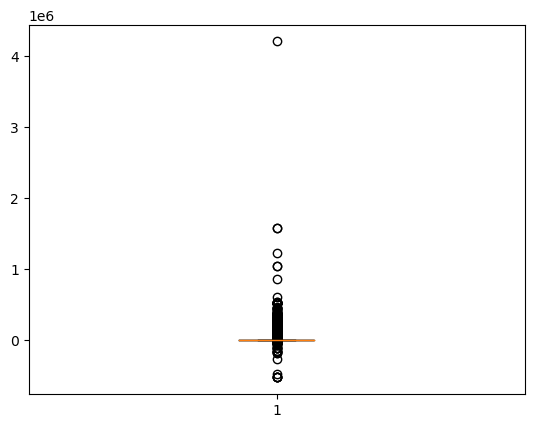

In [14]:
plt.boxplot(df['anm_tot_fh'].dropna())

In [16]:
pd.isna(np.NAN)

True